### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [5]:
### Data Collection
# import pandas_datareader as pdr
# key="c9e75f30a86baea1b8928b7226aeb746a0d18797"

In [9]:
# df = pdr.get_data_tiingo('AAPL', api_key=key)

In [10]:
# df.to_csv('NIFTY.csv')

In [120]:
import pandas as pd

In [121]:
df=pd.read_csv('nifty.csv')

In [122]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03-Jan-05,2080.00,2118.60,2080.00,2115.0,161679423
1,04-Jan-05,2116.95,2120.15,2100.55,2103.7,161679423
2,05-Jan-05,2103.75,2105.10,1990.15,2032.2,161679423
3,06-Jan-05,2031.55,2035.65,1984.25,1998.3,161679423
4,07-Jan-05,1998.25,2021.45,1992.55,2015.5,161679423


In [123]:
df.tail()

,Date,Open,High,Low,Close,Volume
3977,23-Dec-21,17066.80,17118.65,17015.55,17072.60,161679423
3978,24-Dec-21,17149.50,17155.60,16909.60,17003.75,161679423
3979,27-Dec-21,16937.75,17112.05,16833.20,17086.25,161679423
3980,28-Dec-21,17177.60,17250.25,17161.15,17233.25,161679423
3981,29-Dec-21,17220.10,17285.95,17176.65,17213.60,161679423


In [125]:
df1=df.reset_index()['Close']

In [16]:
df1

0       116.15
1       116.02
2       116.61
3       117.91
4       118.99
         ...  
1252    175.64
1253    176.28
1254    180.33
1255    179.29
1256    179.38
Name: close, Length: 1257, dtype: float64

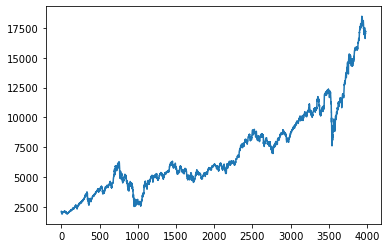

In [126]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [127]:
import numpy as np

In [128]:
df1

0        2115.00
1        2103.70
2        2032.20
3        1998.30
4        2015.50
          ...   
3977    17072.60
3978    17003.75
3979    17086.25
3980    17233.25
3981    17213.60
Name: Close, Length: 3982, dtype: float64

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [130]:
print(df1)

[[0.01282086]
 [0.01213909]
 [0.00782525]
 ...
 [0.91608822]
 [0.92495724]
 [0.92377169]]


In [131]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [132]:
training_size,test_size

(2588, 1394)

In [133]:
train_data

array([[0.01282086],
       [0.01213909],
       [0.00782525],
       ...,
       [0.38214612],
       [0.37603434],
       [0.37576284]])

In [134]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [135]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [136]:
print(X_train.shape), print(y_train.shape)

(2487, 100)
(2487,)


(None, None)

In [137]:
print(X_test.shape), print(ytest.shape)

(1293, 100)
(1293,)


(None, None)

In [138]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [139]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [140]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [141]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Bala: this part take time to complile

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 2487 samples, validate on 1293 samples
Epoch 1/100
2487/2487 [==============================] - 39s 16ms/sample - loss: 0.0049 - val_loss: 0.0018
Epoch 2/100
2487/2487 [==============================] - 34s 14ms/sample - loss: 2.0226e-04 - val_loss: 5.5394e-04
Epoch 3/100
2487/2487 [==============================] - 36s 14ms/sample - loss: 1.6277e-04 - val_loss: 5.7069e-04
Epoch 4/100
2487/2487 [==============================] - 41s 16ms/sample - loss: 1.5150e-04 - val_loss: 5.3604e-04
Epoch 5/100
2487/2487 [==============================] - 44s 18ms/sample - loss: 1.5279e-04 - val_loss: 6.6891e-04
Epoch 6/100
2487/2487 [==============================] - 44s 18ms/sample - loss: 1.4448e-04 - val_loss: 4.7045e-04
Epoch 7/100


In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.0.0'

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

202.21362022255346

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

148.9687640108145

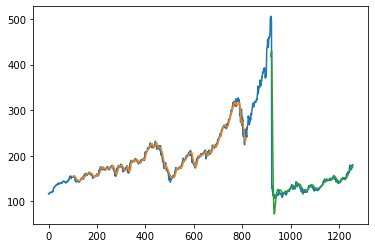

In [42]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

440

In [101]:
#bala: 100 elements required
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [102]:
x_input.shape

(1, 100)

In [103]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [104]:
# temp_input
#bala: added a random element since 100 elements required
# temp_input.append(0.09708202880400746)
len(temp_input)
# temp_input

100

In [105]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17432146]
101
1 day input [0.09708203 0.09773325 0.10532248 0.10584847 0.11090795 0.10857858
 0.0989856  0.09983719 0.10356919 0.10737633 0.10715091 0.10399499
 0.10194114 0.10459612 0.11591735 0.11268629 0.11438948 0.11724483
 0.11887289 0.12485911 0.12090169 0.11829681 0.10552286 0.10697558
 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954 0.09164684
 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397  0.09014402
 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618
 0.09031935 0.09009393 0.08683782 0.085335   0.09247339 0.09517846
 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631
 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781 0.10815279
 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292
 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465
 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078
 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216
 0.17092048 0.16961803 0.181866  

8 day output [[0.17926404]]
9 day input [0.10356919 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612
 0.11591735 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911
 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 

19 day output [[0.180345]]
20 day input [0.12485911 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386
 0.10567314 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082
 0.10016281 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277
 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935
 0.09009393 0.08683782 0.085335   0.09247339 0.09517846 0.09946149
 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995
 0.10522229 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469
 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292 0.10276769
 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724
 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455
 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048
 0.16961803 0.181866   0.17257358 0.16904195 0.18149029 0.16385723
 0.16105197 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013
 0.18146525 0.18169067 0.17432146 0.17600258 0.17718977 0.17796104
 0.17844544 0.17875506 0

27 day output [[0.18110186]]
28 day input [0.09823419 0.09041954 0.09164684 0.0977082  0.10016281 0.10038823
 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317 0.08090169
 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393 0.08683782
 0.085335   0.09247339 0.09517846 0.09946149 0.10499687 0.10624922
 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229 0.11453976
 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072  0.1113087
 0.10920476 0.1101315  0.10289292 0.10276769 0.10807765 0.10810269
 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445 0.13668128
 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706 0.14256731
 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803 0.181866
 0.17257358 0.16904195 0.18149029 0.16385723 0.16105197 0.15757044
 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525 0.18169067
 0.17432146 0.17600258 0.17718977 0.17796104 0.17844544 0.17875506
 0.1789673  0.17912866 0.17926404 0.17938548 0.17949833 0.17960487
 0.17970631 0.17980346 

In [106]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [107]:
import matplotlib.pyplot as plt

In [108]:
len(df1)

1257

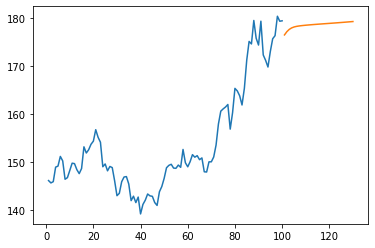

In [110]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

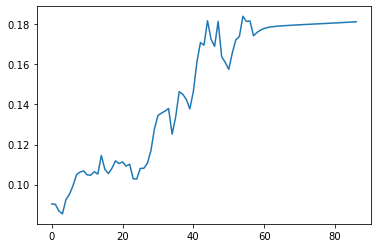

In [111]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [114]:
df3=scaler.inverse_transform(df3).tolist()

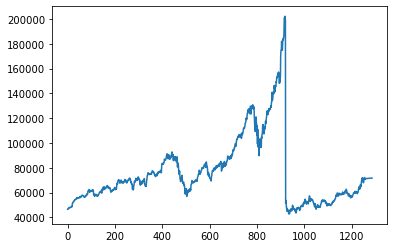

In [115]:
plt.plot(df3)